Importing Libraries and Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/credit_risk_dataset excel.xlsx - modified.csv')
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,23.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


Visualizing Data

In [ ]:
# numerical variebles
num_cols = pd.DataFrame(df[df.select_dtypes(include=['float', 'int']).columns])
# print the numerical variebles
num_cols.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length'],
      dtype='object')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

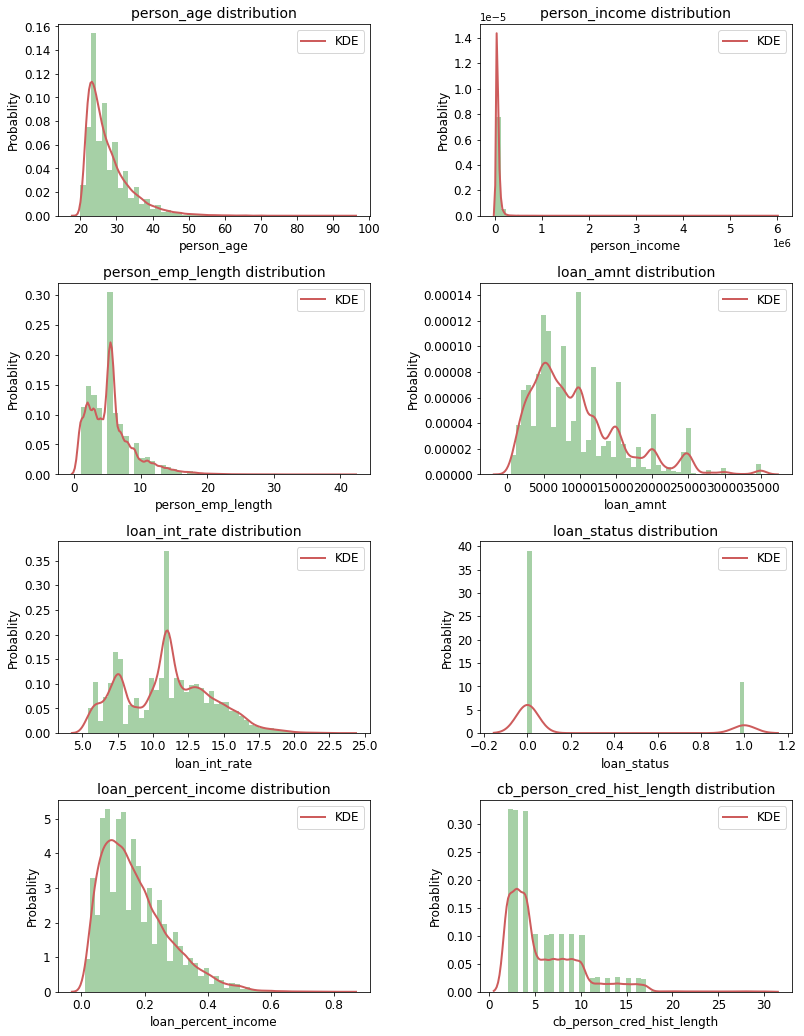

In [ ]:
# visualize the distribution for each varieble according to KDE (Kernel Density Estimate)
plt.figure(figsize=(12,16))

for i, col in enumerate(num_cols.columns):
    idx = int('42'+ str(i+1))
    plt.subplot(idx)
    sns.distplot(num_cols[col], color='forestgreen', 
                 kde_kws={'color': 'indianred', 'lw': 2, 'label': 'KDE'})
    plt.title(col+' distribution', fontsize=14)
    plt.ylabel('Probablity', fontsize=12)
    plt.xlabel(col, fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(['KDE'], prop={"size":12})

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.35)
plt.show()

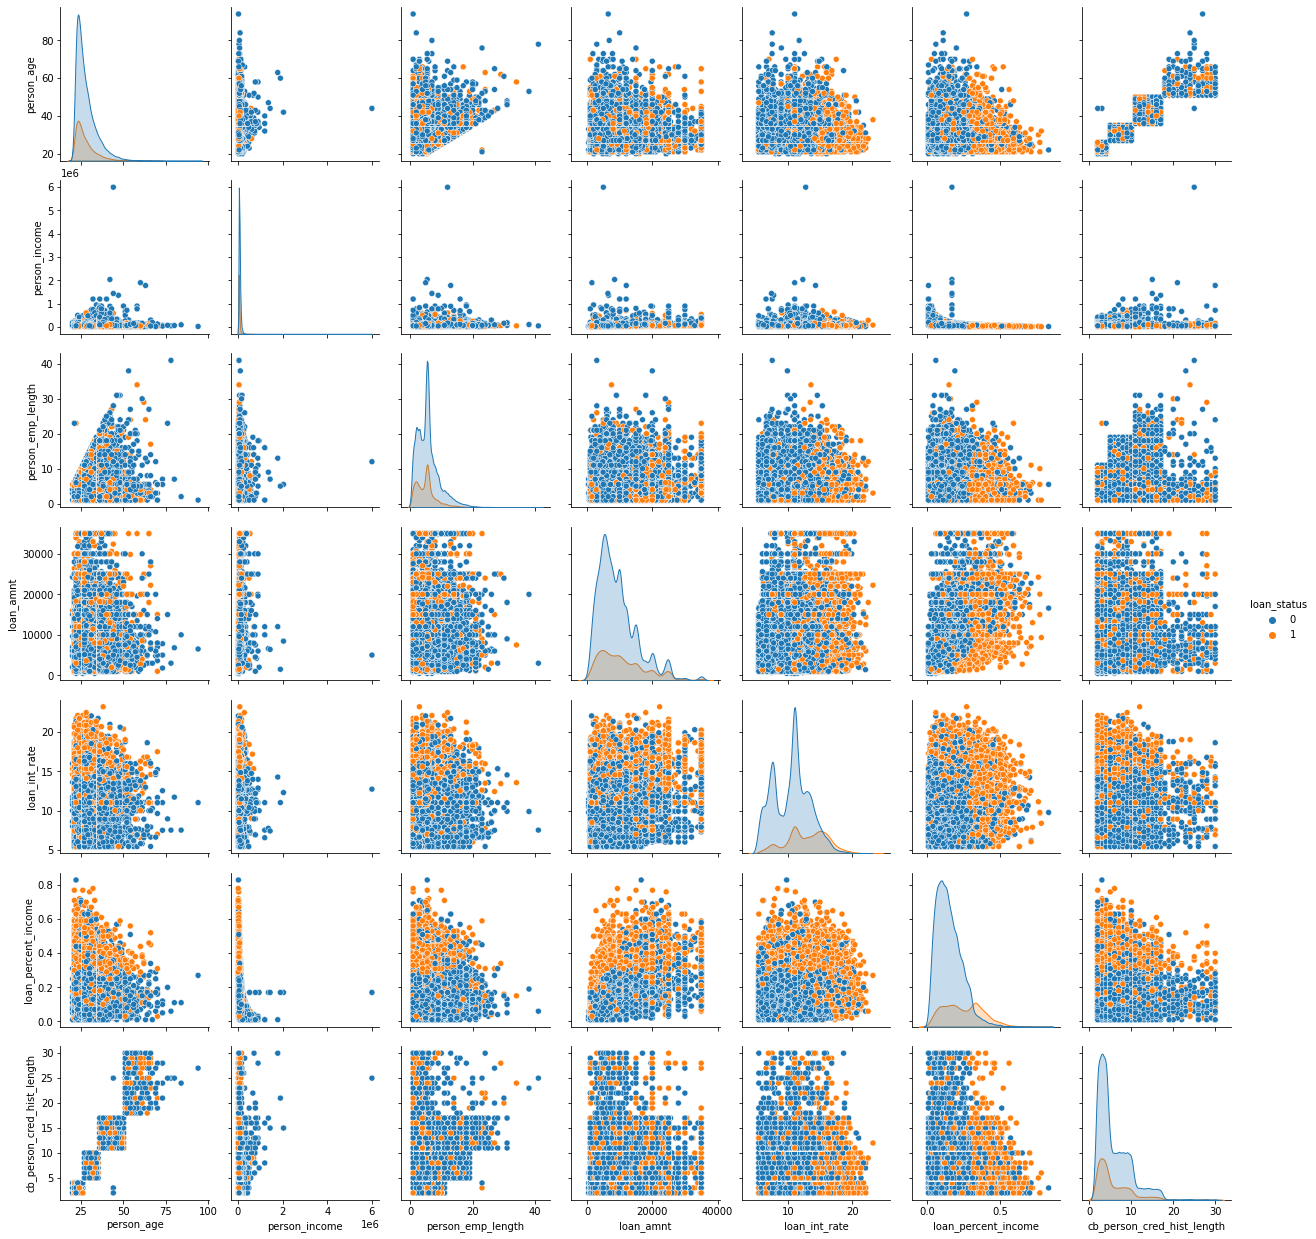

In [ ]:
sns.pairplot(df,hue="loan_status")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

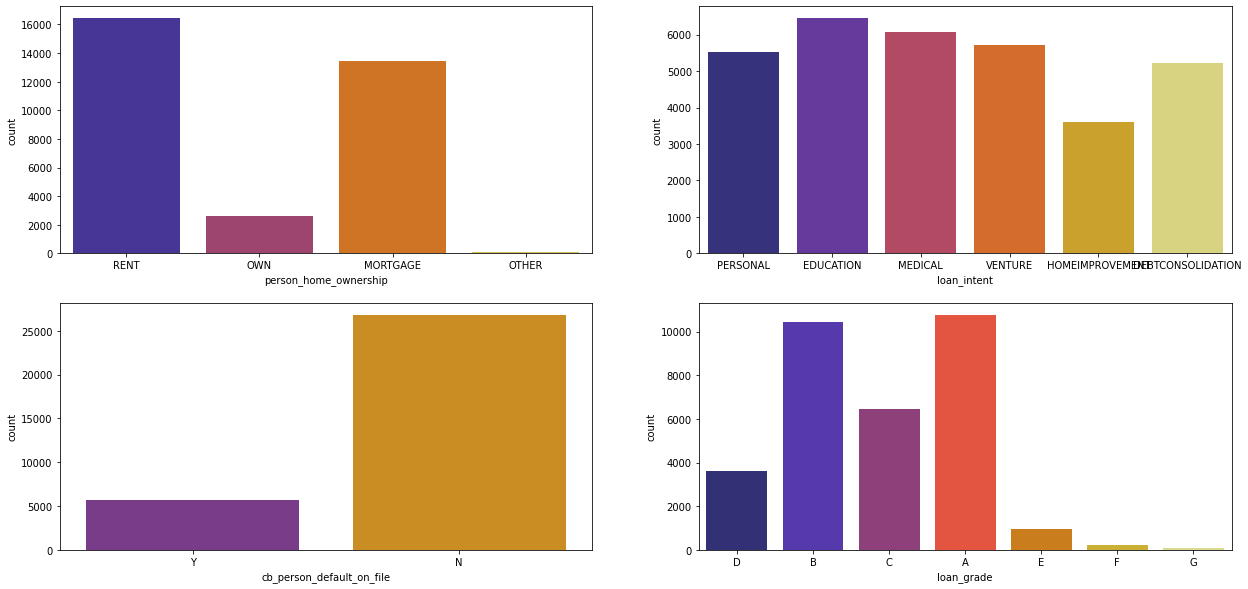

In [ ]:
# Visualizing some features
fig,axes = plt.subplots(2,2, figsize=(21,10))

sns.countplot('person_home_ownership',data=df,ax=axes[0,0],palette='CMRmap')
sns.countplot('loan_intent',data=df,ax=axes[0,1],palette='CMRmap')
sns.countplot('loan_grade',data=df,ax=axes[1,1],palette='CMRmap')
sns.countplot('cb_person_default_on_file',data=df,ax=axes[1,0],palette='CMRmap')

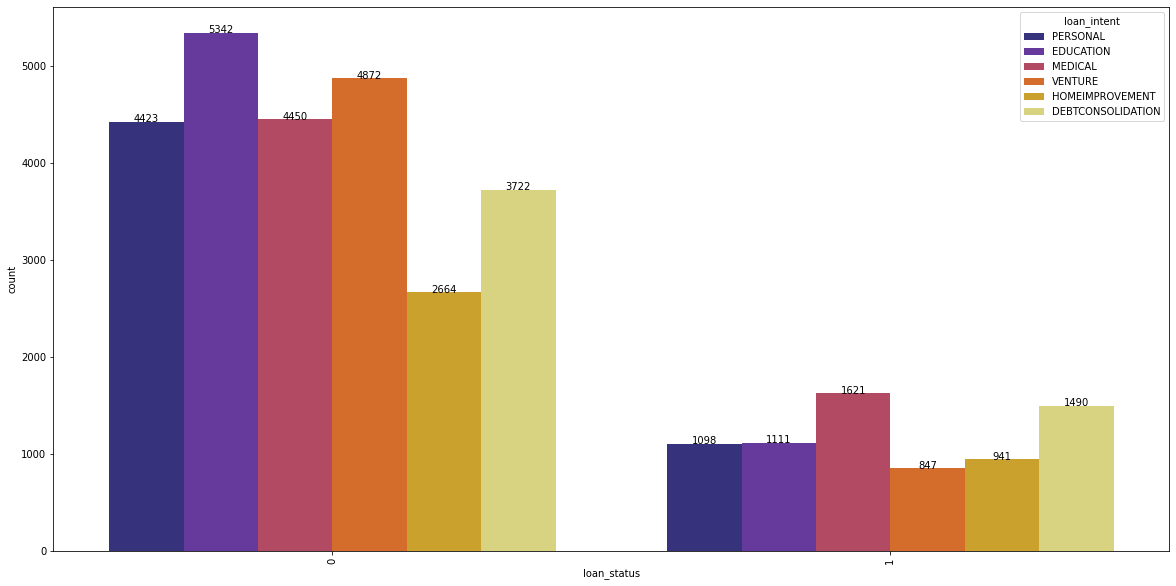

In [ ]:
# Loan Status according to Loan Intent

fig, ax1 = plt.subplots(figsize=(20,10))
graph = sns.countplot(ax=ax1,x='loan_status',hue="loan_intent",data=df, palette="CMRmap")
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

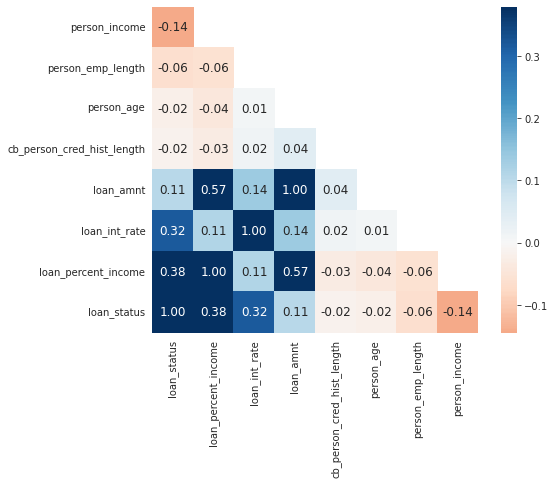

In [ ]:
#Correlation Matrix
corr = df.corr().sort_values('loan_status', axis=1, ascending=False)
corr = corr.sort_values('loan_status', axis=0, ascending=True)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(8, 6))
    ax = sns.heatmap(corr, mask=mask, vmin=corr.loan_status.min(), 
                     vmax=corr.drop(['loan_status'], axis=0).loan_status.max(),
                     square=True, annot=True, fmt='.2f',
                     center=0, cmap='RdBu',annot_kws={"size": 12})

Training & Testing Models with Dataset

In [ ]:
def compute_impurity(feature, impurity_criterion):
    """
    This function calculates impurity of a feature.
    Supported impurity criteria: 'entropy', 'gini'
    input: feature (this needs to be a Pandas series)
    output: feature impurity
    """
    probs = feature.value_counts(normalize=True)
    
    if impurity_criterion == 'entropy':
        impurity = -1 * np.sum(np.log2(probs) * probs)
    elif impurity_criterion == 'gini':
        impurity = 1 - np.sum(np.square(probs))
    else:
        raise ValueError('Unknown impurity criterion')
        
    return(round(impurity, 3))


target_entropy = compute_impurity(df['loan_status'], 'entropy')
target_entropy

0.757

In [ ]:
def comp_feature_information_gain(df, target, descriptive_feature, split_criterion):
     
    print('target feature:', target)
    print('descriptive_feature:', descriptive_feature)
    print('split criterion:', split_criterion)
            
    target_entropy = compute_impurity(df[target], split_criterion)

    # we define two lists below:
    # entropy_list to store the entropy of each partition
    # weight_list to store the relative number of observations in each partition
    entropy_list = list()
    weight_list = list()
    
    # loop over each level of the descriptive feature
    # to partition the dataset with respect to that level
    # and compute the entropy and the weight of the level's partition
    for level in df[descriptive_feature].unique():
        df_feature_level = df[df[descriptive_feature] == level]
        entropy_level = compute_impurity(df_feature_level[target], split_criterion)
        entropy_list.append(round(entropy_level, 3))
        weight_level = len(df_feature_level) / len(df)
        weight_list.append(round(weight_level, 3))

    print('impurity of partitions:', entropy_list)
    print('weights of partitions:', weight_list)

    feature_remaining_impurity = np.sum(np.array(entropy_list) * np.array(weight_list))
    print('remaining impurity:', feature_remaining_impurity)
    
    information_gain = target_entropy - feature_remaining_impurity
    print('information gain:', information_gain)
    
    print('====================')

    return(information_gain)

In [ ]:
split_criterion = 'entropy'
for feature in df.drop(columns='loan_status').columns:
    feature_info_gain = comp_feature_information_gain(df, 'loan_status', feature, split_criterion)

target feature: loan_status
descriptive_feature: person_age
split criterion: entropy
impurity of partitions: [0.801, 0.885, 0.764, 0.749, 0.754, 0.739, 0.696, 0.567, 0.722, 0.714, 0.729, 0.726, 0.766, 0.735, 0.733, 0.737, 0.717, 0.768, 0.742, 0.779, 0.811, 0.728, 0.775, 0.673, 0.667, 0.551, 0.649, 0.633, 0.836, 0.837, 0.803, 0.629, 0.918, 0.732, 0.784, 0.918, 0.991, 0.871, 0.837, -0.0, 0.985, 0.997, 0.934, 0.918, 0.592, 0.863, -0.0, -0.0, 0.353, -0.0, 0.918, -0.0, -0.0, -0.0, -0.0, -0.0]
weights of partitions: [0.112, 0.038, 0.093, 0.119, 0.109, 0.076, 0.004, 0.0, 0.03, 0.022, 0.052, 0.026, 0.057, 0.019, 0.035, 0.066, 0.04, 0.017, 0.008, 0.002, 0.003, 0.015, 0.009, 0.005, 0.007, 0.003, 0.011, 0.003, 0.006, 0.002, 0.002, 0.001, 0.0, 0.001, 0.001, 0.0, 0.0, 0.001, 0.0, 0.0, 0.0, 0.0, 0.001, 0.001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
remaining impurity: 0.7521819999999999
information gain: 0.0048180000000001
target feature: loan_status
descriptive_feature: person_i

In [ ]:
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [ ]:
df1 = df.drop(columns=['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file'])

In [ ]:
df2 = df1.dropna()
df2

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
0,22,59000,23.0,35000,16.02,1,0.59,3
1,21,9600,5.0,1000,11.14,0,0.10,2
2,25,9600,1.0,5500,12.87,1,0.57,3
3,23,65500,4.0,35000,15.23,1,0.53,2
4,24,54400,8.0,35000,14.27,1,0.55,4
...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0,0.11,30
32577,54,120000,4.0,17625,7.49,0,0.15,19
32578,65,76000,3.0,35000,10.99,1,0.46,28
32579,56,150000,5.0,15000,11.48,0,0.10,26


In [ ]:
data_clean2 = df2.drop_duplicates()
data_clean2.shape

(31746, 8)

In [ ]:
X = data_clean2.drop('loan_status', axis=1)
y = data_clean2['loan_status']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
y_pred = rfc.predict(X_test)
RFC_acc = round(accuracy_score(y_test, y_pred)*100,2)
print("Accuracy Score :", RFC_acc, "%")

Accuracy Score : 86.8 %


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  0.6645316253002402
Precision Score :  0.7464028776978417
Recall Score :  0.5988455988455988


Support Vector Machine

In [ ]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
SVM_acc = round(accuracy_score(y_test, y_pred)*100,2)
print("Model accuracy score:", SVM_acc, "%")

Model accuracy score: 80.99 %


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  0.2836795252225519
Precision Score :  0.7993311036789298
Recall Score :  0.17243867243867245
